Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Vishrut Vanga"
COLLABORATORS = ""

---

In [2]:
# Macros
!pip install kaleido #used for image comparison. Will only be installed the first time
import kaleido
pokemonpath = "../../shared/Datasets/myPokemon.csv"
masterpokemonpath = "../../shared/Datasets/pokemon_master_list.csv"
earthquakepath = "../../shared/Datasets/usearthquake.csv"

import pandas as pd
import numpy as np
import re
import sys
sys.path.append('../../shared/Tests/')
import A3test

Defaulting to user installation because normal site-packages is not writeable


# **CS 210**: Assignment 3 [100 points]


For this assignment, you will write a Python module called **A3sub.py** in which you will define the  functions below. 

We are providing you with a stub file **A3sub.py** that contains the function definitions. **Do not change the definitions.** Functions are defined with hints (noted ->) which specify what types the function is expected to output. You can define your own helper functions, as long as the main function for each question follows the given template.

#### <font color="red">Read carefully, submission instructions different from before.</font>
You should submit the Assignment via CodeBench. Click submit next to the assignment. This will submit a snapshot of your whole directory. We will grade the file **A3sub.py <font color="red">as well as</font> the file Assignment3.ipynb** You need to make sure to run the tests in Assignment3.ipynb as they will generate the plots and make sure that the plots are submitted on CodePost as part of your submission. **Make sure to save Assignment3.ipynb before submitting.**
*Make also sure that the \*.png files generated by the tests are in your submission directory and are submitted*

You can submit as many times as you want before the deadline, but each submission creates a new snapshot and **erases the previous submission**.

# Part 1: Pokemon Dataset [60 points]
For this part, you will use the datasets located in CodeBench in `/shared/Datasets/myPokemon.csv` which represents data about a set of Pokemon

The data consists of a list of 66 Pokemons and their statistics. Some information is missing. 
In this part of the assignment, we will ask you to clean and plot the data.



In [3]:
myPokemon = pd.read_csv(pokemonpath)
masterPokemonlist = pd.read_csv(masterpokemonpath)
myPokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         66 non-null     object 
 1   level        66 non-null     float64
 2   personality  66 non-null     object 
 3   type         46 non-null     object 
 4   weakness     66 non-null     object 
 5   atk          46 non-null     float64
 6   def          46 non-null     float64
 7   hp           46 non-null     float64
 8   stage        66 non-null     float64
dtypes: float64(5), object(4)
memory usage: 4.8+ KB


----

## Question 1 [40 points]
Write a function `cleanPokemonData(pokemon_df, master_df)` that takes a pokemon DataFrame as input (the DataFrame is assumed to be formatted in the same way as `/shared/Datasets/myPokemon.csv`), as well as a dataframe containing a master list of pokemon directory information (such as `/shared/Datasets/pokemon_master_list.csv`)

The function should return a cleaned dataframe that performs the following operations on the data:

1. Add a column *"nationalnumber"* (in lower case) to the dataset that matches the Pokemon name to its National Pokemon Number, which you can find in the file `/shared/Datasets/pokemon_master_list.csv` (you should use pd.merge() to get full credit on this question). *[10 points]*

2. Fill the missing values in the *"type"* column using information from the Pokemon master file `/shared/Datasets/pokemon_master_list.csv`, using the *"Type_1"* value in the master list and formatting it to match your pokemon dataframe *"type"* format, i.e., lower case. (You can use the pd.merge() from 1. to help combine the data). Note that in some cases, the existing `myPokemon.csv` type info does not match that of the master file, in those cases, you should keep the type that was already in `myPokemon.csv`. *[10 points]*
   *(For those of you who play Pokemon, ignore potential errors in `MyPokemon.csv`, you should keep *'type'* values that already exist in `MyPokemon.csv` and only replace the *NaN* ones with the type information from the master file)* 

  
4. Fill in the missing (NaN) values in the Attack ("atk"), Defense ("def"), and Hit Points ("hp") columns as follows: 
   
   a. Fill the missing *"atk"* values by setting them to the average *"atk"* value of the Pokemon of the same type. So, for instance, you would substitute the missing *"atk"* value for Bellsprout (type grass), with the average *"atk"* value for Pokemon with type "grass". Round the average to one decimal place. (*Hint: you can use transform() with groupby()*)
   If a Pokemon has a type that no other Pokemon in the dataset has, its *"atk"* should be set to the mean of the whole dataset (after cleaning the other missing *"atk"* values) *[10 points]*
   
   b. Fill the missing *"hp"* values by setting them to the average "hp" value of the Pokemon of the same level range. For this, you will separate Pokemons into two groups: low level (<50) and high level (>=50). The missing "hp" of a Pokemon is set to the average "hp" of Pokemons in the same level group. So, for instance, you would substitute the missing "hp" value for Metapod (level 4), with the average "hp" value for Pokemon whose level is <50. Round the average to one decimal place. *[5 points]*

   c. Fill the missing *"def"* values by setting them to *def = 0.3 \* atk + 0.15 \* hp + 75*. *[5 points]*

Your output dataframe should have the following columns ['name', 'level', 'personality', 'type', 'weakness', 'atk', 'def', 'hp', 'stage', 'nationalnumber'], in any order.

In [4]:
#1.1
from A3sub import cleanPokemonData

def cleanPokemonData(pokemon_df: pd.DataFrame, master_df: pd.DataFrame)-> pd.DataFrame:
    #First step
    m_df = master_df.rename(columns={'Pokemon': 'name'})
    c_df = pokemon_df.merge(m_df,on=['name'])
    c_df = c_df.rename(columns={'NationalNumber': 'nationalnumber'})
    m_df = m_df.drop(['NationalNumber', 'name'], axis=1)
    c_df = c_df.drop(m_df.columns, axis=1)
    #Second step
    m2_df = master_df.rename(columns={'Pokemon': 'name'})
    c2_df = pokemon_df.merge(m2_df, on=['name'])
    c_df['type'] = c_df['type'].fillna(c2_df.Type_1.str.lower())
    #Third Step
    #To find the atk
    c_df['atk'] = c_df['atk'].fillna(c_df.groupby('type')['atk'].transform('mean'))
    c_df['atk'] = c_df['atk'].fillna(c_df['atk'].mean())
    c_df['atk'] = c_df['atk'].apply(lambda x: round(x, 1))
    #To find hp values
    lowlevel = c_df[c_df['level'] < 50]
    highlevel = c_df[c_df['level'] >= 50]
    lowmean = lowlevel['hp'].mean(skipna=True)
    highmean = highlevel['hp'].mean(skipna=True)
    c_df.loc[(c_df.hp.isna()) & (c_df.level < 50), 'hp'] = lowmean
    c_df.loc[(c_df.hp.isna()) & (c_df.level >= 50), 'hp'] = highmean
    c_df['hp'] = c_df['hp'].apply(lambda x: round(x, 1))
    #To find def values
    c_df['def'] = c_df['def'].fillna(0.3*c_df['atk'] + 0.15*c_df['hp'] + 75)
    #pokdf = c_df['type'].value_counts()
    #print(pokdf)
    #print(c_df.info())
    #print(c_df.info())
    return c_df
    
mycleanPokemon = cleanPokemonData(myPokemon,masterPokemonlist)  

In [5]:
mycleanPokemon

,name,level,personality,type,weakness,atk,def,hp,stage,nationalnumber
0,Persian,40.0,mild,normal,fighting,104.0,116.0,115.8,2.0,#053
1,Magmar,44.0,docile,fire,water,96.0,83.0,153.0,1.0,#126
2,Primeape,9.0,lonely,fighting,flying,139.5,66.0,43.0,2.0,#057
3,Venusaur,44.0,sassy,grass,fire,136.0,195.0,92.0,3.0,#003
4,Metapod,4.0,naive,grass,fire,101.6,114.0,115.8,2.0,#011
...,...,...,...,...,...,...,...,...,...,...
61,Persian,87.0,jolly,normal,fighting,74.0,123.0,172.0,2.0,#053
62,Arcanine,69.0,jolly,fire,water,35.0,88.5,20.0,2.0,#059
63,Metapod,17.0,mild,bug,fire,191.0,127.0,115.8,2.0,#011
64,Golem,78.0,hardy,rock,water,65.0,145.0,137.0,3.0,#076


#### Testing Question 1.1

In [6]:
import A3test
from A3test import TestQuestion1_1
TestQuestion1_1()


----------------------------------------
Testing Question 1_1

A3sub.cleanPokemonData(myPokemon,masterPokemonlist)
Testing column names
Test passed.
Testing national number
Test passed.
Testing types
Test passed.
Testing attack
Test passed.
Testing defense
Test passed.
Testing HP
Test passed.


---

## Question 2 [20 points]

You should write two separate functions to plot the data in your cleaned dataset from question 1.
(If you cannot clean the dataset as required by Question 1, you can use the one at `/shared/Datasets/myCleanPokemon.csv` as input.)

### 2.a
Write a function `plotPokemonByType(cleanpokemon_df)` that returns a **matplotlib (fig,ax)** tuple that:
* Creates a figure of size (8,4)
* Creates a barchart of the count of Pokemon by type. Bars should be sorted in alphabetical type order. Bars should be colored according to the `TYPECOLOR` color chart given below and in the `A3sub.py` definition that was provided to you. The width of the bars should be set to 0.6
* The x-ticks should be the Pokemon 'type'
* The plot title should be 'Number of Pokemon by Type' in size 14
* The y-axis label should be 'Number of Pokemon' in size 12
A sample of the image you should produce is in `/shared/Datasets/PokemonByType.png`

### 2.b
Write a function `plotAllPokemon(cleanpokemon_df)` that returns a **matplotlib (fig,ax)** tuple that:
* Creates a figure of size (8,4)
* Creates a scatterplot Pokemon on their *'def'* value (x-axis) and *'atk'* value (y-axis). Points should be colored according to the `TYPECOLOR` color chart given below and in the `A3sub.py` definition that was provided to you. Points size should be proportional to the Pokemon level.
* The plot title should be 'My Pokemon' in size 14
* The y-axis label should be 'Attack' in size 12
* The x-axis label should be 'Defense' in size 12
A sample of the image you should produce is in `/shared/Datasets/myPokemon.png`


In [7]:
TYPECOLOR = {'normal': '#A8A77A',\
             'fire': '#EE8130',\
             'water': '#6390F0',\
             'electric': '#F7D02C',\
             'grass': '#7AC74C',\
             'ice': '#96D9D6',\
             'fighting': '#C22E28',\
             'poison': '#A33EA1',\
             'ground': '#E2BF65',\
             'flying': '#A98FF3',\
             'psychic': '#F95587',\
             'bug': '#A6B91A',\
             'rock': '#B6A136',\
             'ghost': '#735797',\
             'dragon': '#6F35FC',\
             'dark': '#705746',\
             'steel': '#B7B7CE',\
             'fairy': '#D685AD',}



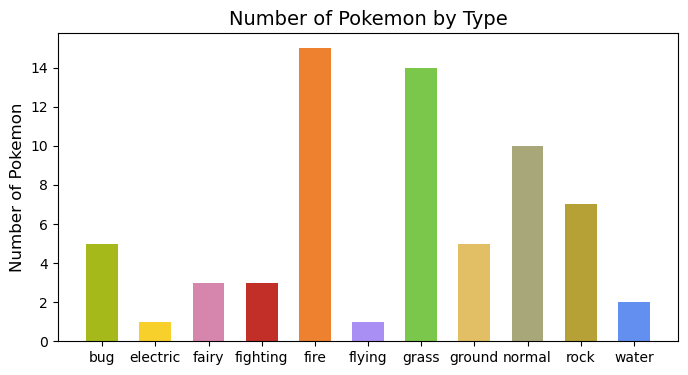

In [8]:
# 1.2.a
from A3sub import plotPokemonByType
import pandas as pd
import numpy as np
import re
import matplotlib
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from typing import List, Dict, Tuple

# def plotPokemonByType(pokemon_df: pd.DataFrame) -> Tuple[matplotlib.figure.Figure, plt.Axes]: 
#     fig,ax = plt.subplots(figsize=(8, 4))
#     pokemon_path = "../../shared/Datasets/myCleanPokemon.csv"
#     pokemon_df = pd.read_csv(pokemon_path)
#     ### you need to set the following (may require some data manipulation as well)
#     #ax.bar()
#     #ax.set_xticks()
#     #ax.set_title()
#     #ax.set_ylabel()
#     pokdf = pokemon_df['type'].value_counts()
#     pokdf = pokdf.sort_index()
#     plt.bar(range(len(pokdf)),pokdf.values, width=0.6, color=[TYPECOLOR['bug'], TYPECOLOR['electric'], TYPECOLOR['fairy'], TYPECOLOR['fighting'], TYPECOLOR['fire'], TYPECOLOR['flying'], TYPECOLOR['grass'], TYPECOLOR['ground'], TYPECOLOR['normal'], TYPECOLOR['rock'], TYPECOLOR['water']])
#     plt.xticks(range(len(pokdf)),pokdf.index)
#     plt.title('Number of Pokemon by Type',fontsize=14)
#     plt.ylabel('Number of Pokemon',fontsize=12)
#     return fig,ax
fig,ax = plotPokemonByType(mycleanPokemon)

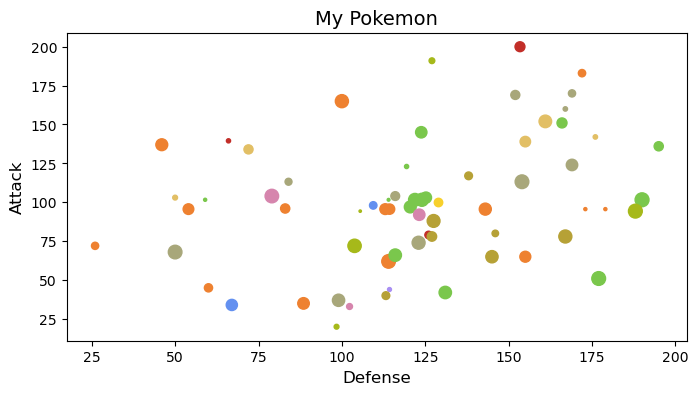

In [9]:
# 1.2.b
from A3sub import plotAllPokemon

def plotAllPokemon(pokemon_df: pd.DataFrame) -> Tuple[matplotlib.figure.Figure, plt.Axes]:
    fig,ax = plt.subplots(figsize=(8, 4))
    pokemon_path = "../../shared/Datasets/myCleanPokemon.csv"
    pokemon_df = pd.read_csv(pokemon_path)
    ### you need to set the following (may require some data manipulation as well)
    xvals = np.array(pokemon_df['def'])
    yvals = np.array(pokemon_df['atk'])
    for t, color in TYPECOLOR.items():
        df_subset = pokemon_df[pokemon_df['type'] == t]
        ax.scatter(df_subset['def'], df_subset['atk'], s=df_subset['level'] ,c=color)
    #plt.scatter(xvals, yvals, s=pokemon_df['level'], color=TYPECOLOR[xvals])
    #ax.scatter()
    plt.title('My Pokemon',fontsize=14)
    plt.xlabel('Defense', fontsize=12)
    plt.ylabel('Attack', fontsize=12)
    #ax.set_title()
    #ax.set_xlabel()
    #ax.set_ylabel()
    return fig,ax


fig,ax = plotAllPokemon(mycleanPokemon)

# Testing Question 1.2 and show image for grading

Note that these tests use image comparison. They will save the plots produced by your functions in `submission1_2a.png` and `submission1_2b.png`. **This is the only way for us to see the image in CodePost, if you don't run the test, we won't see the plot.**

If the images are the same as the sample images, the tests will pass.
If they are not the same, a difference *png* file will be created as `submission1_2a-failed-diff.png` or `submission1_2b-failed-diff.png`. You can check the file to see the differences visually (for example, if you forget the title, the 'failed' file will be all black with the missing title in white). <font color="red">These tests compare images pixel by pixel. They are far from perfect. Use them as a guide to see if you are on the right track, but don't stress over small placement differences.</font>

Note that the tests call your function on the dataframe from the sample `myCleanPokemon.csv` file.


----------------------------------------
Testing Question 1_2a

A3sub.plotPokemonByType(myCleanPokemon)
Test passed.


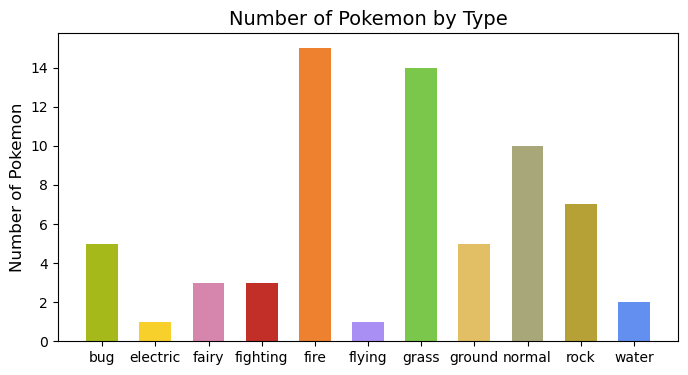

In [10]:
from A3test import TestQuestion1_2a
TestQuestion1_2a()


----------------------------------------
Testing Question 1_2b

A3sub.plotAllPokemon(myCleanPokemon)
Images are different: Error: Image files did not match.
  RMS Value: 1.1921120962392757
  Expected:  
    ../../shared/Datasets/myPokemon.png
  Actual:    
    submission1_2b.png
  Difference:
    submission1_2b-failed-diff.png
  Tolerance: 
    0.1


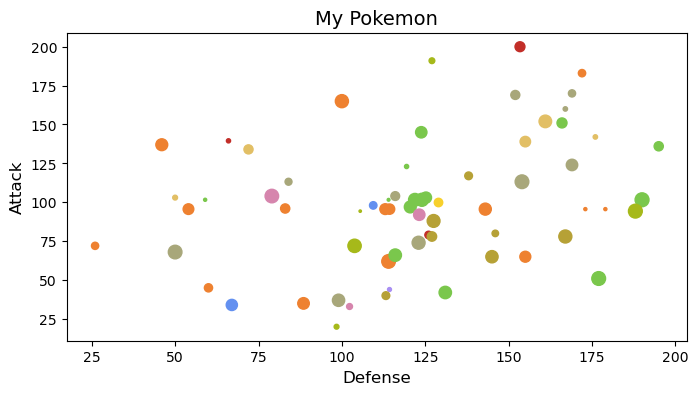

In [11]:
from A3test import TestQuestion1_2b
TestQuestion1_2b()

---

# Part 2: Earthquake Dataset [40 points]
For this part, you will use the datasets located in CodeBench in `/shared/Datasets/usearthquake.csv` which was also used in Recitation 10.

The datasets contains infomation about earthquakes in the U.S. from 2000 to 2024. It was retrieved from the USGS (https://earthquake.usgs.gov/earthquakes/search/). You can find more details about the data and the meaning of the columns on the website.

We want to plot the earthquake on a map of the continental U.S.
As discussed in class, the data set contains all eathquakes since 01-01-2000 in a geographical longitude/latitude range that includes the continental U.S., but is not limited to it. 
Therefore, we need to clean the data.



## Question 1 [25 points]

Write a function `getUSState(earthquake_df)` that takes a DataFrame as input (the DataFrame is assumed to be formatted in the same way as `/shared/Datasets/usearthquake.csv`), and adds a column State that contains the two-letter State abbreviation (e.g., 'NJ') of the 'place' of the earthquake if it happened in a US State, and NaN otherwise.

For this question, you will be graded on the content of the 'State' column only.

Some hints: 
* There are multiple ways to clean the data; all the information you need is in the *'place'* column; you can look at other columns such as 'locationSource' or 'longitude' and 'latitude' to help you, but you don't have to. You can also use regular expressions, but this is not required
* The presence or absence of a string is not necessarily enough to identify a location. For instance, New Mexico is in the US and Campo Pesquero el Colorado is in Mexico.
* While the majority of the task can be automated, this type of real-world data cleaning task often requires some entries to be manually checked (should not be more than 15). Note that an earthquake that happens under the ocean or in the Gulf of California is not technically *in* the continental US. (I.e., if the location specifically says Ocean or Gulf, it is at sea)
* There are a few points that are slightly off the coast but the location has them in a State (e.g. index 361 is "279 km SSW of Avalon, California", which technically is in the ocean but you can keep it in CA. I am not expecting you to check all points individually. If 'place' implies it is in a US State, map it to that state.
* A3sub.py contains a dictionary that maps state names to their two-letter abbreviation `US_STATE_TO_ABBRV`


In [12]:
eq_df = pd.read_csv(earthquakepath)
eq_df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-10-25T15:04:23.620Z,36.550833,-117.056000,4.5800,4.54,ml,34.0,147.0,0.50940,0.16,...,2024-10-31T22:31:11.924Z,"10 km SE of Stovepipe Wells, CA",earthquake,0.260000,31.6100,0.109,15.0,reviewed,ci,ci
1,2024-10-25T08:05:08.330Z,36.602667,-117.095500,4.3400,4.72,mw,34.0,146.0,0.44880,0.17,...,2024-10-30T21:33:20.042Z,"5 km E of Stovepipe Wells, CA",earthquake,0.340000,31.6100,NaN,6.0,reviewed,ci,ci
2,2024-09-17T00:49:42.183Z,32.411000,-102.057000,6.1279,5.10,ml,24.0,38.0,0.00000,0.10,...,2024-11-05T00:59:52.257Z,"2024 North of Tarzan, Texas Earthquake",earthquake,0.398162,1.1197,0.200,36.0,reviewed,tx,tx
3,2024-09-12T14:28:21.610Z,34.056500,-118.812667,11.3500,4.69,mw,145.0,101.0,0.03238,0.29,...,2024-11-07T14:38:35.562Z,"6 km N of Malibu, CA",earthquake,0.230000,0.3400,NaN,6.0,reviewed,ci,ci
4,2024-08-07T04:10:44.540Z,35.108833,-119.115000,11.9800,4.60,ml,49.0,50.0,0.05627,0.24,...,2024-10-24T17:56:51.040Z,"25 km SW of Lamont, CA",earthquake,0.220000,0.7900,0.118,30.0,reviewed,ci,ci
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2000-04-25T14:06:26.070Z,32.130667,-115.095833,5.9630,4.50,ml,26.0,246.0,0.61400,0.55,...,2017-02-09T01:28:13.654Z,"11km SW of Estacion Coahuila, B.C., MX",earthquake,3.650000,31.6100,0.202,249.0,reviewed,ci,ci
728,2000-03-24T04:23:45.750Z,27.551000,-111.303000,10.0000,5.60,mwc,NaN,NaN,NaN,1.35,...,2022-04-29T19:02:52.631Z,"51 km SSW of San Carlos, Mexico",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
729,2000-03-04T02:42:01.000Z,49.170000,-114.030000,1.0000,4.60,ml,NaN,NaN,NaN,NaN,...,2014-11-07T01:09:38.781Z,"35 km S of Pincher Creek, Canada",earthquake,NaN,NaN,NaN,NaN,reviewed,but,but
730,2000-01-11T14:19:52.090Z,38.769333,-122.913833,5.7700,4.59,mw,50.0,48.0,0.05405,0.10,...,2017-03-17T16:02:40.504Z,"6 km N of Geyserville, California",earthquake,0.150000,0.3900,NaN,19.0,reviewed,nc,nc


In [13]:

US_STATE_TO_ABBRV = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "Virgin Islands, U.S.": "VI",
}

In [14]:
from A3sub import getUSState

# def getUSState(eq_df: pd.DataFrame)-> pd.DataFrame:
#     #print(eq_df['place'].str.split(' '))
#     newlist = eq_df['place'].str.split(' ').tolist()
#     newerlist = []
#     #print(eq_df.head(20))
#     for i in range(len(newlist)):
#         ic = 2
#         for j in newlist[i]:
#             if j in US_STATE_TO_ABBRV and ic == 2:
#                 newerlist.append(US_STATE_TO_ABBRV[j])
#                 ic = 3
#             if j in US_STATE_TO_ABBRV.values() and ic != 3:
#                 newerlist.append(j)
#                 ic = 3
#         if ic == 2:
#             newerlist.append(0)
#     #print(newerlist, len(newerlist))
#     eq_df['State'] = newerlist
#     eq_df['State'] = eq_df['State'].replace(0, '')
#     return eq_df
    
    
    
    
        
cleanedeq_df=getUSState(eq_df)
cleanedeq_df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,State
0,2024-10-25T15:04:23.620Z,36.550833,-117.056000,4.5800,4.54,ml,34.0,147.0,0.50940,0.16,...,"10 km SE of Stovepipe Wells, CA",earthquake,0.260000,31.6100,0.109,15.0,reviewed,ci,ci,CA
1,2024-10-25T08:05:08.330Z,36.602667,-117.095500,4.3400,4.72,mw,34.0,146.0,0.44880,0.17,...,"5 km E of Stovepipe Wells, CA",earthquake,0.340000,31.6100,NaN,6.0,reviewed,ci,ci,CA
2,2024-09-17T00:49:42.183Z,32.411000,-102.057000,6.1279,5.10,ml,24.0,38.0,0.00000,0.10,...,"2024 North of Tarzan, Texas Earthquake",earthquake,0.398162,1.1197,0.200,36.0,reviewed,tx,tx,TX
3,2024-09-12T14:28:21.610Z,34.056500,-118.812667,11.3500,4.69,mw,145.0,101.0,0.03238,0.29,...,"6 km N of Malibu, CA",earthquake,0.230000,0.3400,NaN,6.0,reviewed,ci,ci,CA
4,2024-08-07T04:10:44.540Z,35.108833,-119.115000,11.9800,4.60,ml,49.0,50.0,0.05627,0.24,...,"25 km SW of Lamont, CA",earthquake,0.220000,0.7900,0.118,30.0,reviewed,ci,ci,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2000-04-25T14:06:26.070Z,32.130667,-115.095833,5.9630,4.50,ml,26.0,246.0,0.61400,0.55,...,"11km SW of Estacion Coahuila, B.C., MX",earthquake,3.650000,31.6100,0.202,249.0,reviewed,ci,ci,
728,2000-03-24T04:23:45.750Z,27.551000,-111.303000,10.0000,5.60,mwc,NaN,NaN,NaN,1.35,...,"51 km SSW of San Carlos, Mexico",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv,
729,2000-03-04T02:42:01.000Z,49.170000,-114.030000,1.0000,4.60,ml,NaN,NaN,NaN,NaN,...,"35 km S of Pincher Creek, Canada",earthquake,NaN,NaN,NaN,NaN,reviewed,but,but,
730,2000-01-11T14:19:52.090Z,38.769333,-122.913833,5.7700,4.59,mw,50.0,48.0,0.05405,0.10,...,"6 km N of Geyserville, California",earthquake,0.150000,0.3900,NaN,19.0,reviewed,nc,nc,CA


#### Testing Question 2.1

In [15]:
import A3test
from A3test import TestQuestion2_1
TestQuestion2_1()


----------------------------------------
Testing Question 2_1

A3sub.getUSState(earthquake_df)
Testing State
Incorrect States 
Differences in the State column:      self other
10   NaN      
11   NaN      
12   NaN      
13   NaN      
14   NaN      
..   ...   ...
726  NaN      
727  NaN      
728  NaN      
729  NaN      
731  NaN      

[394 rows x 2 columns]


## Question 2 [15 points]

You should write a function to plot the data in your cleaned dataset from question 1 on a Cloropleth map of the US as we did in class with election data in Lecture 15.
(If you cannot clean the dataset as required by Question 1, you can use the one at `/shared/Datasets/CleanEarthquake.csv` as input.)

Write a function `plotEarthquakesByState(clean_eq_df)` that returns a **Plotly Figure** and that:

* Sets the layout of the figure as:
    * width = 800
    * height = 600
    * on a geographical map of the US, using the Albers projection
    * title is "25 Years of US Earthquakes", in size 24, centered (x=0.5)
      <br>
      <br>
* Creates the Cloropleth map using the count of earthquakes in the contiguous US states from Question 1
    * colorscale should be 'Brwnyl'
    * the range of values used for the colorscale should be [0,250]
 
A sample of the image you should produce is in `/shared/Datasets/earthquakesByStates.png`



In [ ]:
import kaleido
from A3sub import plotEarthquakesByState
#fig = plotEarthquakesByState(cleanedeq_df)
#fig.write_image("my_image.png")

def plotEarthquakesByState(eq_df: pd.DataFrame) -> go.Figure:
    ### you need to set the following (may require some data manipulation as well)
    eq_path = "../../shared/Datasets/CleanEarthquake.csv"
    eq_df = pd.read_csv(eq_path)
    #print(eq_df.State.value_counts())
    values = eq_df['State'].value_counts(dropna=False).keys().tolist()
    counts = eq_df['State'].value_counts(dropna=False).tolist()
    value_dict = dict(zip(values, counts))
    #print(value_dict)
    newdf = pd.DataFrame(list(value_dict.items()), columns=['State', 'Counts'])
    data=[]
    title="25 Years of US Earthquakes"
    layout = dict(font=dict(size=8), geo=dict(scope="usa", projection=dict(type="albers usa")), width=800, height=600,title = dict(text=title, font=dict(size=24), x=0.5))
    data.append(go.Choropleth(locations=newdf['State'], z=newdf['Counts'], locationmode="USA-states", colorscale="Brwnyl",zmax=250,zmin=0))
    fig = go.Figure(data=data, layout=layout)
    return fig


plotEarthquakesByState(cleanedeq_df)

# Testing Question 2.2 and show image for grading
Note that this test uses image comparison. It will save the plot produced by your function in `submission2_2.png` and show it in the notebook below. **This is the only way for us to see the image in CodePost, if you don't run the test, we won't see the plot.**

If the image is the same as the sample image, the test will pass.
If they are not the same, a difference *png* file will be created as `submission2_2-failed-diff.png`. You can check the file to see the differences visually (for example, if you forget the title, the 'failed' file will be all black with the missing title in white). <font color="red">This test compares images pixel by pixel. It is far from perfect. Use it as a guide to see if you are on the right track, but don't stress over small placement differences.</font>

Note that the test calls your function on the dataframe from the sample `CleanEarthquake.csv` file

In [ ]:
from A3test import TestQuestion2_2
TestQuestion2_2()

#need to run code below to have image for grading
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
# Load the image
img = mpimg.imread('submission2_2.png')

# Display the image
print("Display Image")
plt.imshow(img)
plt.show()

-----